<a href="https://colab.research.google.com/github/Soonchon/2019-smart-city-ml-2/blob/master/final%20projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Final Project For Machine Learning 2019, University of Seoul



Due date: December 20, 2019

I will be away next week, but the students should be around to help
out during the regular class time.

The MAGIC telescope is a Cerenkov gamma ray telescope. They have
opened some of their simulation data, and we will try to build a
classifier with it. You can read more about the telescope [here](http://scipp.ucsc.edu/seminars/experimental/PanequeTalk.pdf) or [on
wikipedia](https://en.wikipedia.org/wiki/MAGIC_(telescope)) but briefly (you can skip the explanation if you just want
to get to the data ;-), there is a long-standing mystery in physics
about *dark matter*. When we look at the rotation of galaxies, or
gravitational lensing (light from a distant object lensed by a nearby
heavy gravitational source) or at the photon spectrum from the early
universe, it appears that there is about 5 times more matter than what
we estimate from the visible matter. Since there is no known (heavy)
physics particle that doesn't interact by giving off light, the source
of this *dark matter* is completely unknown, but many theories say
that it is some kind of particle and could weakly interact with
regular matter that we know about.  In particular, very high energy
*gamma rays* (high energy photons or light particles) might be
produced in dark matter collisions in various parts of the
galaxy. They are looking for these gamma rays from dark matter or
other cosmic sources that interact in our sky and produce a detectable
signal in the telescope. Unfortunately, the primary source of events
they will detect are from hadronic *cosmic-rays*. These are (usually)
protons that have, for instance, been produced in supernovae,
accelerated by the galaxy's gravitational field, and are constantly
bombarding the atmosphere of the earth (this is the reason why you get
a high radiation dose when you fly). Therefore, it is important that
we can find gamma ray events and get rid of the hadron events.

The goal of the project is to take the data and build a classifier for
gamma ray 'g' or hadron 'h' events. Since there is expected to be many
more hadron than gamma rays, getting the best accuracy is not good
enough, you should find a classifier with the best ROC curve.

You can download the data with the next cell, and in the meantime,
read the description from openml below which gives a bit more detail
about how the data was actually made.



In [0]:
from sklearn.datasets import fetch_openml

mt = fetch_openml('MagicTelescope')
dir(mt)

['DESCR', 'categories', 'data', 'details', 'feature_names', 'target', 'url']

In [0]:
print(mt.DESCR)

#+begin_example
,**Author**: R. K. Bock. Major Atmospheric Gamma Imaging Cherenkov Telescope project (MAGIC)  
Donated by P. Savicky, Institute of Computer Science, AS of CR, Czech Republic  
,**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/magic+gamma+telescope)  
,**Please cite**: Bock, R.K., Chilingarian, A., Gaug, M., Hakl, F., Hengstebeck, T., Jirina, M., Klaschka, J., Kotrc, E., Savicky, P., Towers, S., Vaicilius, A., Wittek W. (2004). 
Methods for multidimensional event classification: a case study using images from a Cherenkov gamma-ray telescope. Nucl.Instr.Meth. A, 516, pp. 511-528.  

The data are MC generated (see below) to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. Cherenkov gamma telescope observes high energy gamma rays, taking advantage of the radiation emitted by charged particles produced inside the electromagnetic showers initiated by the gammas, and developing in

In the targets of the data, photon events are listed as `'g'` and
hadrons as `'h'`. Our goal is to find photon events, so lets set them
to 1, and hadrons to 0, and also move the data into its own
variable. Now, we can use data for X, and targets for y.



In [0]:
import numpy as np
targets = np.array(list({'g':1,'h':0}[t] for t in mt.target))
data = mt.data
mt.target, targets

(array(['g', 'g', 'g', ..., 'h', 'h', 'h'], dtype=object),
 array([1, 1, 1, ..., 0, 0, 0]))

Start by plotting each of the variables (there are 10 in all) as 1D
histograms, with the gamma and hadron samples in different colored
histograms but on the same plot. Be sure to label the plots based on
the description above.



In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [0]:
dtg = pd.DataFrame(targets, index=None , columns=['identity'])
dtg

targets = np.array(list({'g':1,'h':0}[t] for t in mt.target))
data2 = mt.data
mt.target, targets


from pandas import Series, DataFrame
column_names = ('fLength',   'fWidth',   'fSize',   'fConc',   'fConc1',   'fAsym',   'fM3Long',   'fM3Trans',   'fAlpha',   'fDist')
data = pd.DataFrame(data2, columns = column_names)
data
data = pd.concat([data,dtg], axis=1, sort=False)
data

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,identity
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


No handles with labels found to put in legend.


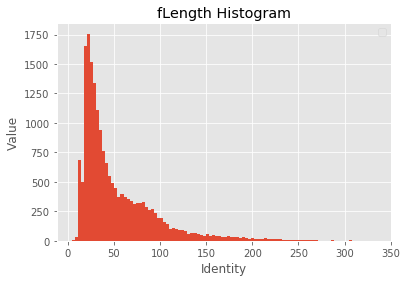

In [0]:
%matplotlib inline
plt.style.use('ggplot')
plt.title('fLength Histogram')

plt.xlabel('Identity')
plt.ylabel('Value')
plt.bar(x,y,label='gamma')
plt.bar(x2,y2,label='hadron')
plt.hist(data['fLength'], bins=100)
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


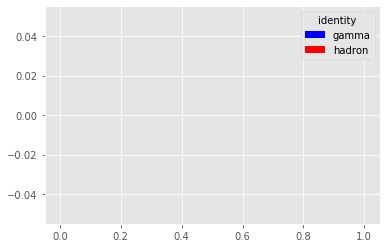

In [0]:
plt.hist(data[data.identity == '1']["fLength"], 
             color="blue", label="gamma")
plt.hist(data[data.identity == '0']["fLength"], 
             color="red", label="hadron")
plt.legend(title="identity")
plt.show()

array([1, 1, 1, ..., 0, 0, 0])

Now, take two of the variables that look like they can separate the

data well, and draw them on a 2D scatter plot.



/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


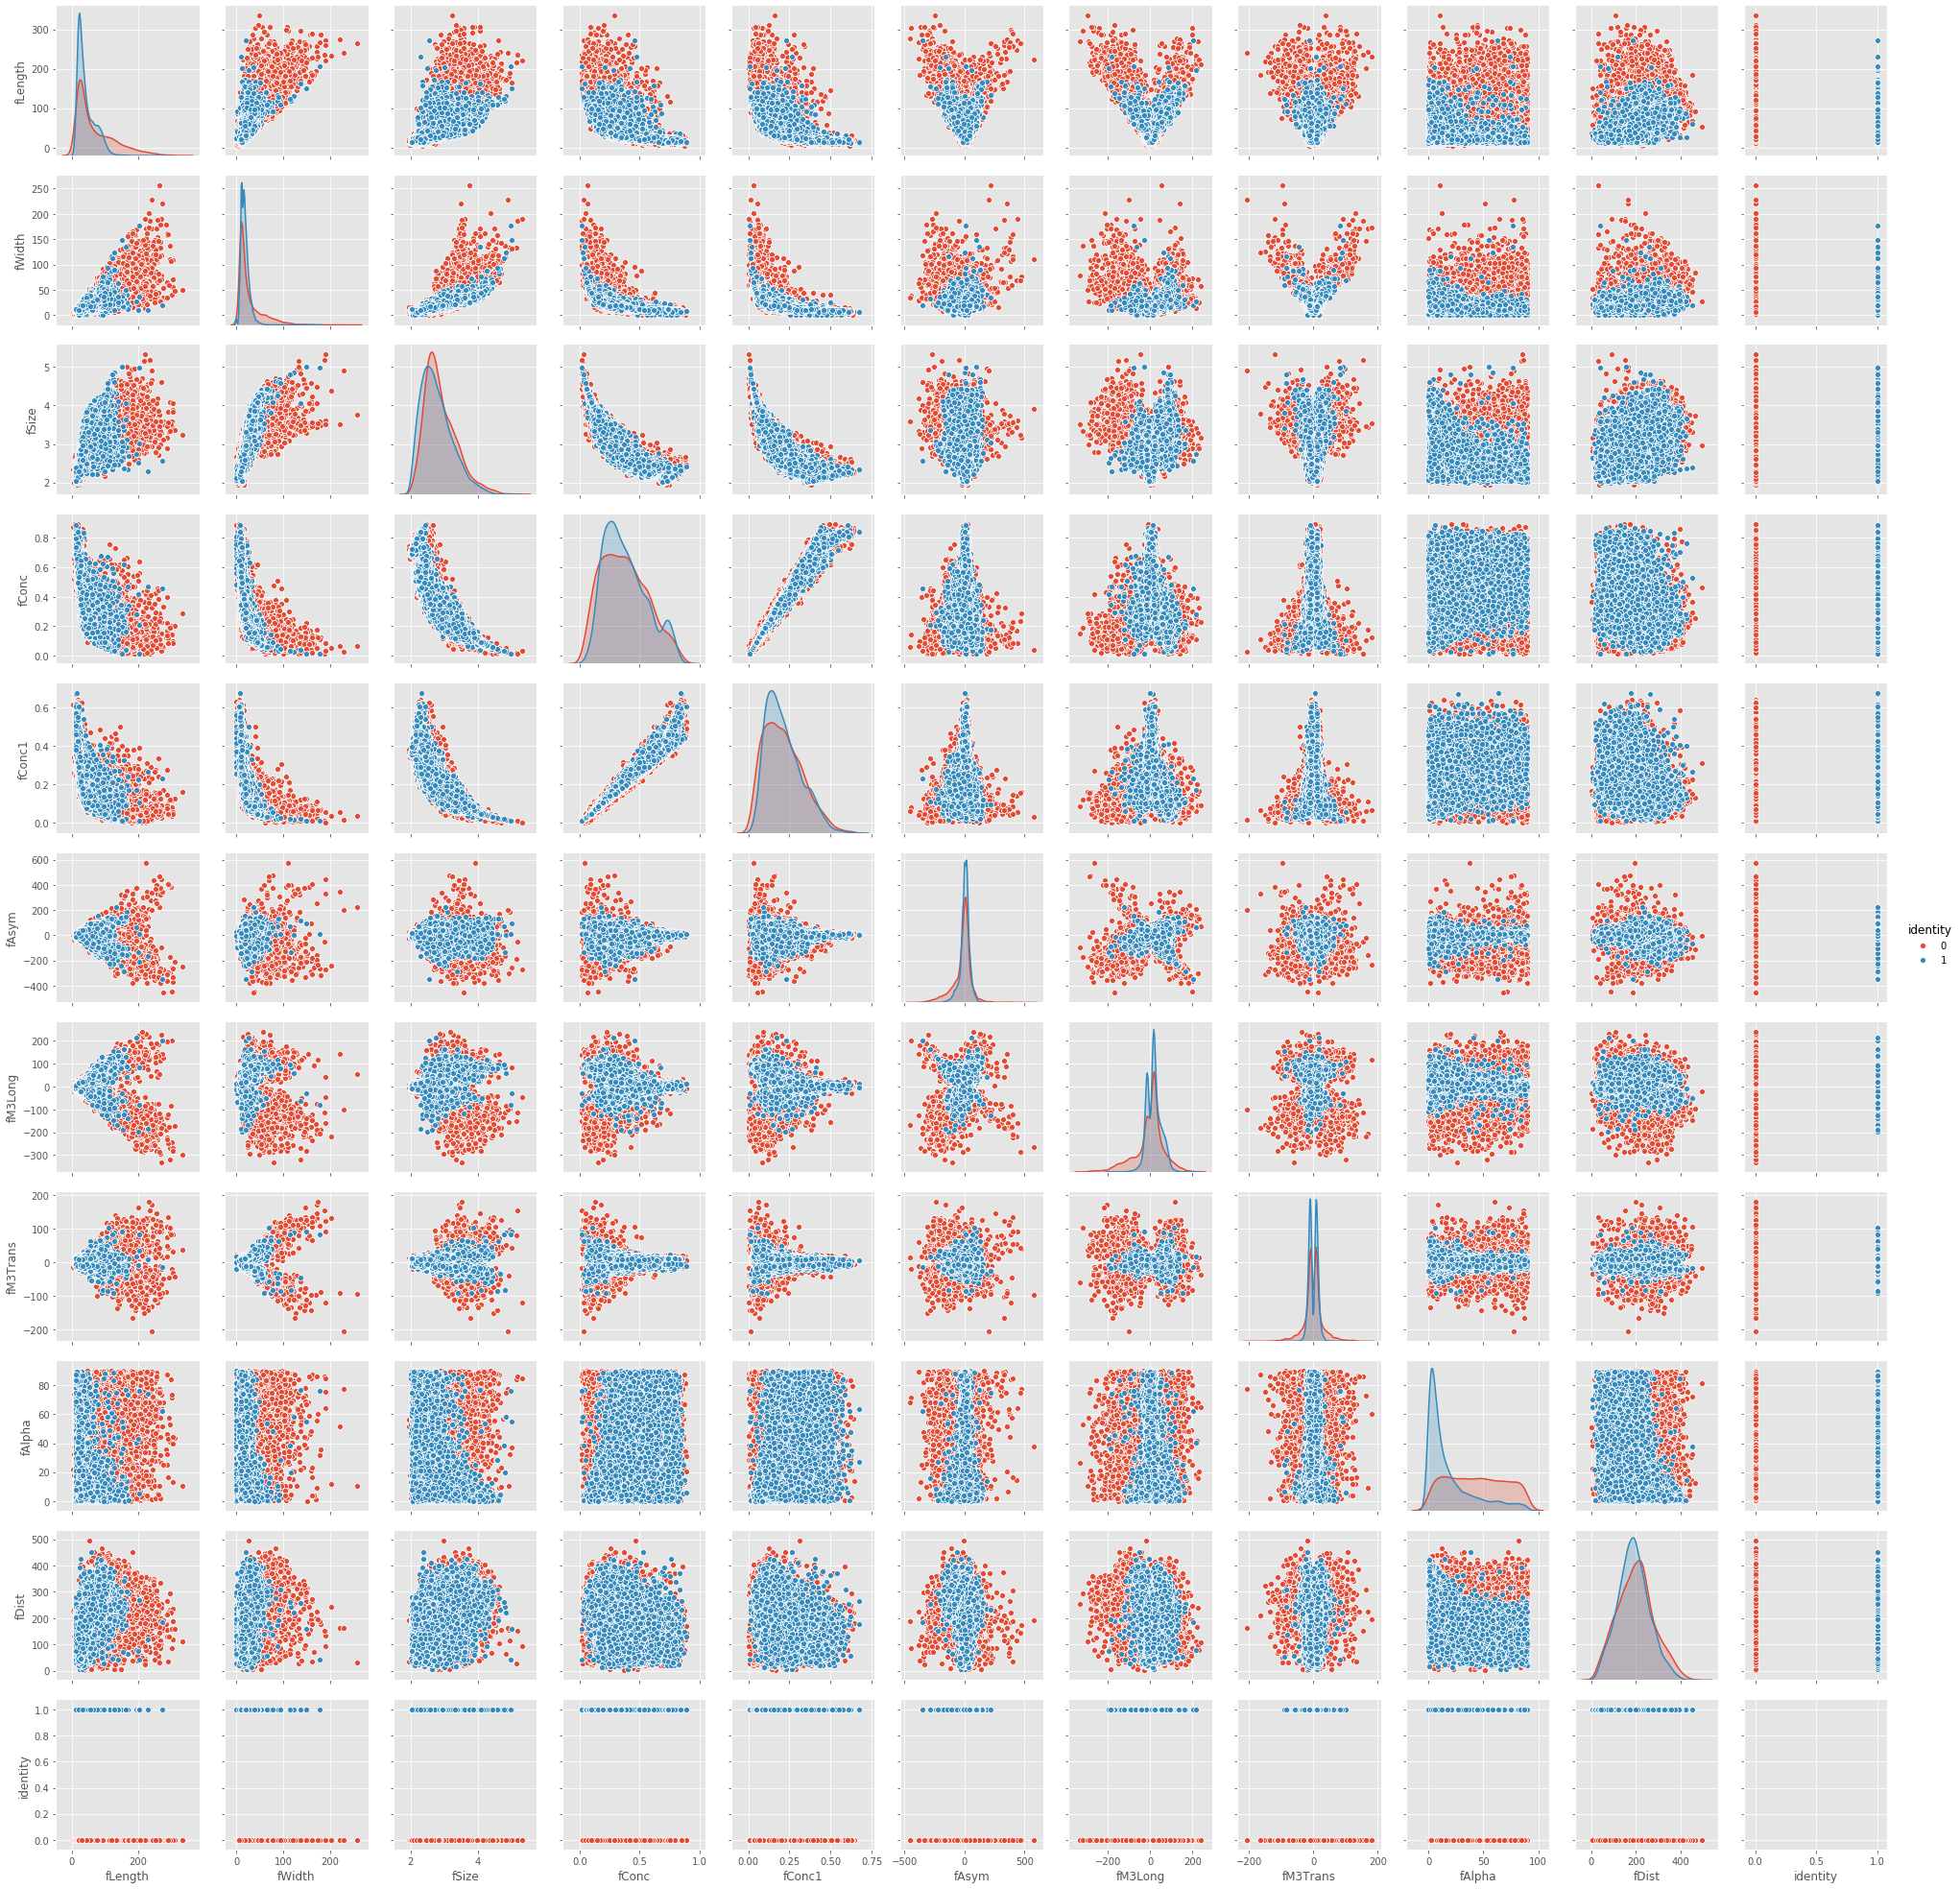

In [0]:
import seaborn as sns
from sklearn import datasets

sns.pairplot(data, hue ='identity')

Before we make a classifier we should, of course, split the data into
a testing and a training sample. Use
`sklearn.model_selection.train_test_split` to split the data into
`X_train, X_test, y_train, y_test`, where 20% of the data are randomly
chosen to be in the test set.



In [0]:
from sklearn.model_selection import train_test_split

In [0]:
load_data

<function __main__.load_data>

In [0]:
dfX = pd.DataFrame(data, columns=data.fLength)
dfy = pd.DataFrame(data.identity, columns=["Class"])
df = pd.concat([dfX, dfy], axis=1)

N = len(df)
ratio = 0.8
np.random.seed(0)
idx_train = np.random.choice(np.arange(N), np.int(ratio * N))
idx_test = list(set(np.arange(N)).difference(idx_train))

df_train = df.iloc[idx_train]
df_test = df.iloc[idx_test]

Now train a classifier of your choice on the data. Tune a
hyperparameter to give the best accuracy without overtraining. For
example, for neural networks you could tune the number of nodes, for a
decision tree the depth of the trees, and for a boosted decision tree
the number of trees. Make a plot justifying your final choice of this
hyperparmeter.



With the tuned classifier, plot the ROC curve, and from the ROC curve
find your true positive rate (TPR) for the false positive rates 1%,
10% and 20%. These are the numbers the MAGIC team wants to see.



Finally, repeat the above for a different choice of classifier (tune a
hyperparameter, and find the ROC curve). Plot the two ROC curves on
top of each other. How do the classifiers compare? Which would you
give to the MAGIC team?

